In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4721655996952840089, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17793462298767848983
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18310184958774238634
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13006934794047224203
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ipshitarong","key":"960a230ee5c38d14798b1d0d1e315ca0"}'}

In [0]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d greg115/celebrities-100k

 99% 817M/828M [00:16<00:00, 55.5MB/s]
100% 828M/828M [00:16<00:00, 51.9MB/s]


In [0]:
! mkdir 100k

In [10]:
!unzip celebrities-100k.zip -d 100k

Streaming output truncated to the last 5000 lines.
  inflating: 100k/100k/100k/192420.jpg  
  inflating: 100k/100k/100k/192422.jpg  
  inflating: 100k/100k/100k/192424.jpg  
  inflating: 100k/100k/100k/192428.jpg  
  inflating: 100k/100k/100k/192429.jpg  
  inflating: 100k/100k/100k/192430.jpg  
  inflating: 100k/100k/100k/192435.jpg  
  inflating: 100k/100k/100k/192437.jpg  
  inflating: 100k/100k/100k/192438.jpg  
  inflating: 100k/100k/100k/192440.jpg  
  inflating: 100k/100k/100k/192442.jpg  
  inflating: 100k/100k/100k/192444.jpg  
  inflating: 100k/100k/100k/192445.jpg  
  inflating: 100k/100k/100k/192447.jpg  
  inflating: 100k/100k/100k/192448.jpg  
  inflating: 100k/100k/100k/192450.jpg  
  inflating: 100k/100k/100k/192456.jpg  
  inflating: 100k/100k/100k/192457.jpg  
  inflating: 100k/100k/100k/192460.jpg  
  inflating: 100k/100k/100k/192465.jpg  
  inflating: 100k/100k/100k/192467.jpg  
  inflating: 100k/100k/100k/192468.jpg  
  inflating: 100k/100k/100k/192469.jpg  
  infl

In [0]:
!mkdir dataset
!mkdir dataset/fake
!mkdir dataset/real

In [0]:
!mkdir fake

In [13]:
!unzip drive/'My Drive'/saveimages/fakeceleb100k2.zip -d fake

Streaming output truncated to the last 5000 lines.
  inflating: fake/output/samples_15_341.png  
 extracting: fake/output/samples_31_249.png  
  inflating: fake/output/samples_16_126.png  
 extracting: fake/output/samples_19_101.png  
  inflating: fake/output/samples_32_169.png  
  inflating: fake/output/samples_33_333.png  
 extracting: fake/output/samples_3_286.png  
 extracting: fake/output/samples_22_363.png  
 extracting: fake/output/samples_40_12.png  
 extracting: fake/output/samples_36_317.png  
 extracting: fake/output/samples_24_300.png  
  inflating: fake/output/samples_24_209.png  
 extracting: fake/output/samples_11_273.png  
  inflating: fake/output/samples_6_140.png  
  inflating: fake/output/samples_19_204.png  
  inflating: fake/output/samples_2_353.png  
  inflating: fake/output/samples_42_221.png  
 extracting: fake/output/samples_28_72.png  
  inflating: fake/output/samples_1_435.png  
 extracting: fake/output/samples_3_71.png  
  inflating: fake/output/samples_14_1

In [0]:

real_data = ['100k/100k/100k/'+f for f in os.listdir('100k/100k/100k/') if f.endswith('.jpg')]
fake_data = ['fake/output/'+f for f in os.listdir('fake/output/') if f.endswith('.png')]

In [0]:
real_data = real_data[:29500]
fake_data = fake_data[:29500]

In [0]:
import shutil
c=0
for rea, fak in zip(real_data, fake_data): 
  shutil.copyfile(rea, 'dataset/real/file_'+str(c)+'.jpg')
  shutil.copyfile(fak, 'dataset/fake/file_'+str(c)+'.png')
  c=c+1

In [19]:
!ls -l dataset/fake | wc -l

29501


In [15]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
input_shape = (128, 128, 3)
data_dir = 'dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.jpg')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(0)

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [23]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


In [0]:
EPOCHS = 5
BATCH_SIZE = 100

In [0]:
#Currently not used

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')

history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/5
472/472 [==============================] - ETA: 0s - loss: 0.3143 - accuracy: 0.8554

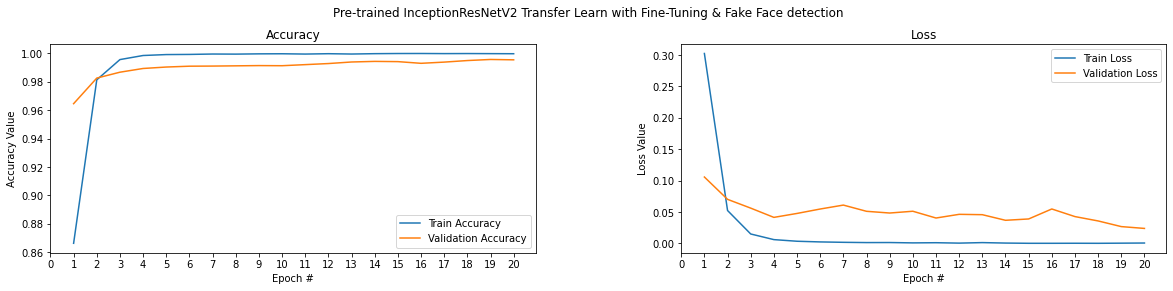

In [0]:
Sf, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained InceptionResNetV2 Transfer Learn with Fine-Tuning & Fake Face detection ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
True positive =  29419
False positive =  81
False negative =  32
True negative =  29468




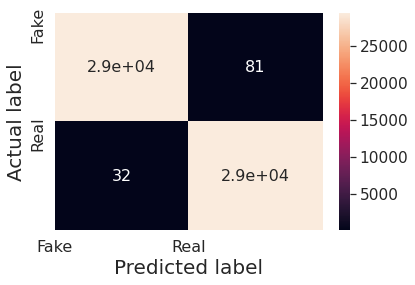

In [0]:
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    
print_confusion_matrix(Y_val_org, model.predict_classes(X))

In [0]:
model.save('deepfake-detection-model.h5')

In [0]:
!pip install tensorboardcolab

In [27]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://94ab446a.ngrok.io
